In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [9]:
df = pd.read_csv('Desktop/Kodilla moduly od 7/fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


 1. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (race) oraz tego, czy wykazywały one oznaki choroby psychicznej (signs_of_mental_illness).

In [13]:
l = df.pivot_table(values = 'manner_of_death', index = 'race', columns = 'signs_of_mental_illness', aggfunc = 'count', fill_value = 0)
print(l)

signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


 2. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało 
oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [16]:
l['odsetek'] = l.apply(lambda row: row[True] / (row[True] + row[False]), axis = 1)
l['odsetek'] = l['odsetek'].round(2)
l

signs_of_mental_illness,False,True,odsetek
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


3. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia 
tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['day'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [24]:
day_intervention = df['day'].value_counts()
day_intervention

day
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

In [26]:
days_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [28]:
day_intervention = day_intervention.reindex(days_order)
day_intervention

day
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

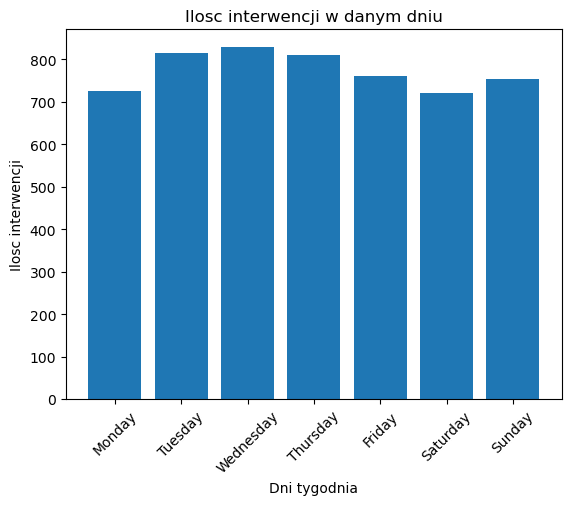

In [32]:
plt.bar(days_order, day_intervention)
plt.xlabel('Dni tygodnia')                      
plt.ylabel('Ilosc interwencji')                   
plt.title('Ilosc interwencji w danym dniu') 
plt.xticks(rotation=45)  
plt.show()

4. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów. 

ludnosc danych stanow

In [752]:
df2 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header = 0)
df2 = df2[0]

skroty nazw stanow 

In [755]:
df3 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header = 0)
short_name = df3[1]

tworzenie nowej, wybranie skrotow i nazw stanow w USA

In [758]:
new_table = short_name[['USPS', 'Name']][2:-1]
new_table

,USPS,Name
2,AL,Alabama
3,AK,Alaska
4,AZ,Arizona
5,AR,Arkansas
6,CA,California
...,...,...
73,AP,U.S. Armed Forces – Pacific[f]
74,NB,Nebraska
75,CM,Northern Mariana Islands
76,CZ,Panama Canal Zone


In [760]:
population_state = df2[['State', 'Census population, April 1, 2020 [1][2]']]

In [762]:
new_table = pd.merge(new_table, population_state, left_on = 'Name', right_on ='State', how = 'inner')
new_table.drop(['Name'], axis = 1, inplace = True)
new_table.columns = ['USPS', 'State', 'Population']
new_table

,USPS,State,Population
0,AL,Alabama,5024279
1,AK,Alaska,733391
2,AZ,Arizona,7151502
3,AR,Arkansas,3011524
4,CA,California,39538223
5,CO,Colorado,5773714
6,CT,Connecticut,3605944
7,DE,Delaware,989948
8,DC,District of Columbia,689545
9,FL,Florida,21538187


In [764]:
states = df['state'].value_counts()
states

state
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
MO    141
TN    139
LA    109
PA    108
NM    106
IL    104
AL    104
NY    101
NV     96
KY     95
IN     95
VA     95
WI     91
OR     88
SC     88
AR     83
MD     79
MI     78
NJ     68
MS     65
MN     61
UT     60
WV     54
KS     50
ID     42
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
NH     13
DC     13
DE     13
ND     11
VT      9
RI      4
Name: count, dtype: int64

In [769]:
new_table = pd.merge(new_table, states, left_on = 'USPS', right_on = 'state', how = 'outer')
new_table = new_table.fillna(0)
new_table

,USPS,State,Population,count
0,AK,Alaska,733391,39.0
1,AL,Alabama,5024279,104.0
2,AR,Arkansas,3011524,83.0
3,AS,American Samoa,49710,0.0
4,AZ,Arizona,7151502,254.0
5,CA,California,39538223,799.0
6,CM,Northern Mariana Islands,47329,0.0
7,CO,Colorado,5773714,195.0
8,CT,Connecticut,3605944,21.0
9,DC,District of Columbia,689545,13.0


In [801]:
def per_1000(row):
    incidents = row['count'] / row['Population'] * 1000 * 100
    incidents = round(incidents, 2)
    return f' {incidents} %'

In [803]:
new_table['Incident per 1000 population'] = new_table.apply(lambda row: per_1000(row), axis = 1)
new_table

,USPS,State,Population,count,Incident per 1000 population
0,AK,Alaska,733391,39.0,5.32 %
1,AL,Alabama,5024279,104.0,2.07 %
2,AR,Arkansas,3011524,83.0,2.76 %
3,AS,American Samoa,49710,0.0,0.0 %
4,AZ,Arizona,7151502,254.0,3.55 %
5,CA,California,39538223,799.0,2.02 %
6,CM,Northern Mariana Islands,47329,0.0,0.0 %
7,CO,Colorado,5773714,195.0,3.38 %
8,CT,Connecticut,3605944,21.0,0.58 %
9,DC,District of Columbia,689545,13.0,1.89 %
